# Define figure projection
Here we should the most minimal use of `Antarctic-Plots`. This example just creates a projection in EPSG:3031, based on a region and figure height (or width). The rest of the example uses standard PyGMT calls.

Import the packages

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from antarctic_plots import fetch, utils, regions, maps
import pygmt

Define a region for the plot

In [9]:
# Options:

# 1) use the full extent of the grid file
# region = utils.get_grid_info(bed)[1]

# 2) use a preset region (antarctic_plots.regions())
# region = regions.antarctic_peninsula

# 3) define your own region, in meters e, w, n, s in EPSG:3031
region = [-2700e3, -2000e3, 1000e3, 2000e3]

Fetch the data to plot

In [10]:
bed = fetch.bedmachine(layer="bed", region=region)

returning grid with new region and/or registration, same spacing


Create a projection from the region and a figure height

In [11]:
proj_xy = utils.set_proj(region, fig_height=15)[0]

Use standard PyGMT commands to plot a figure

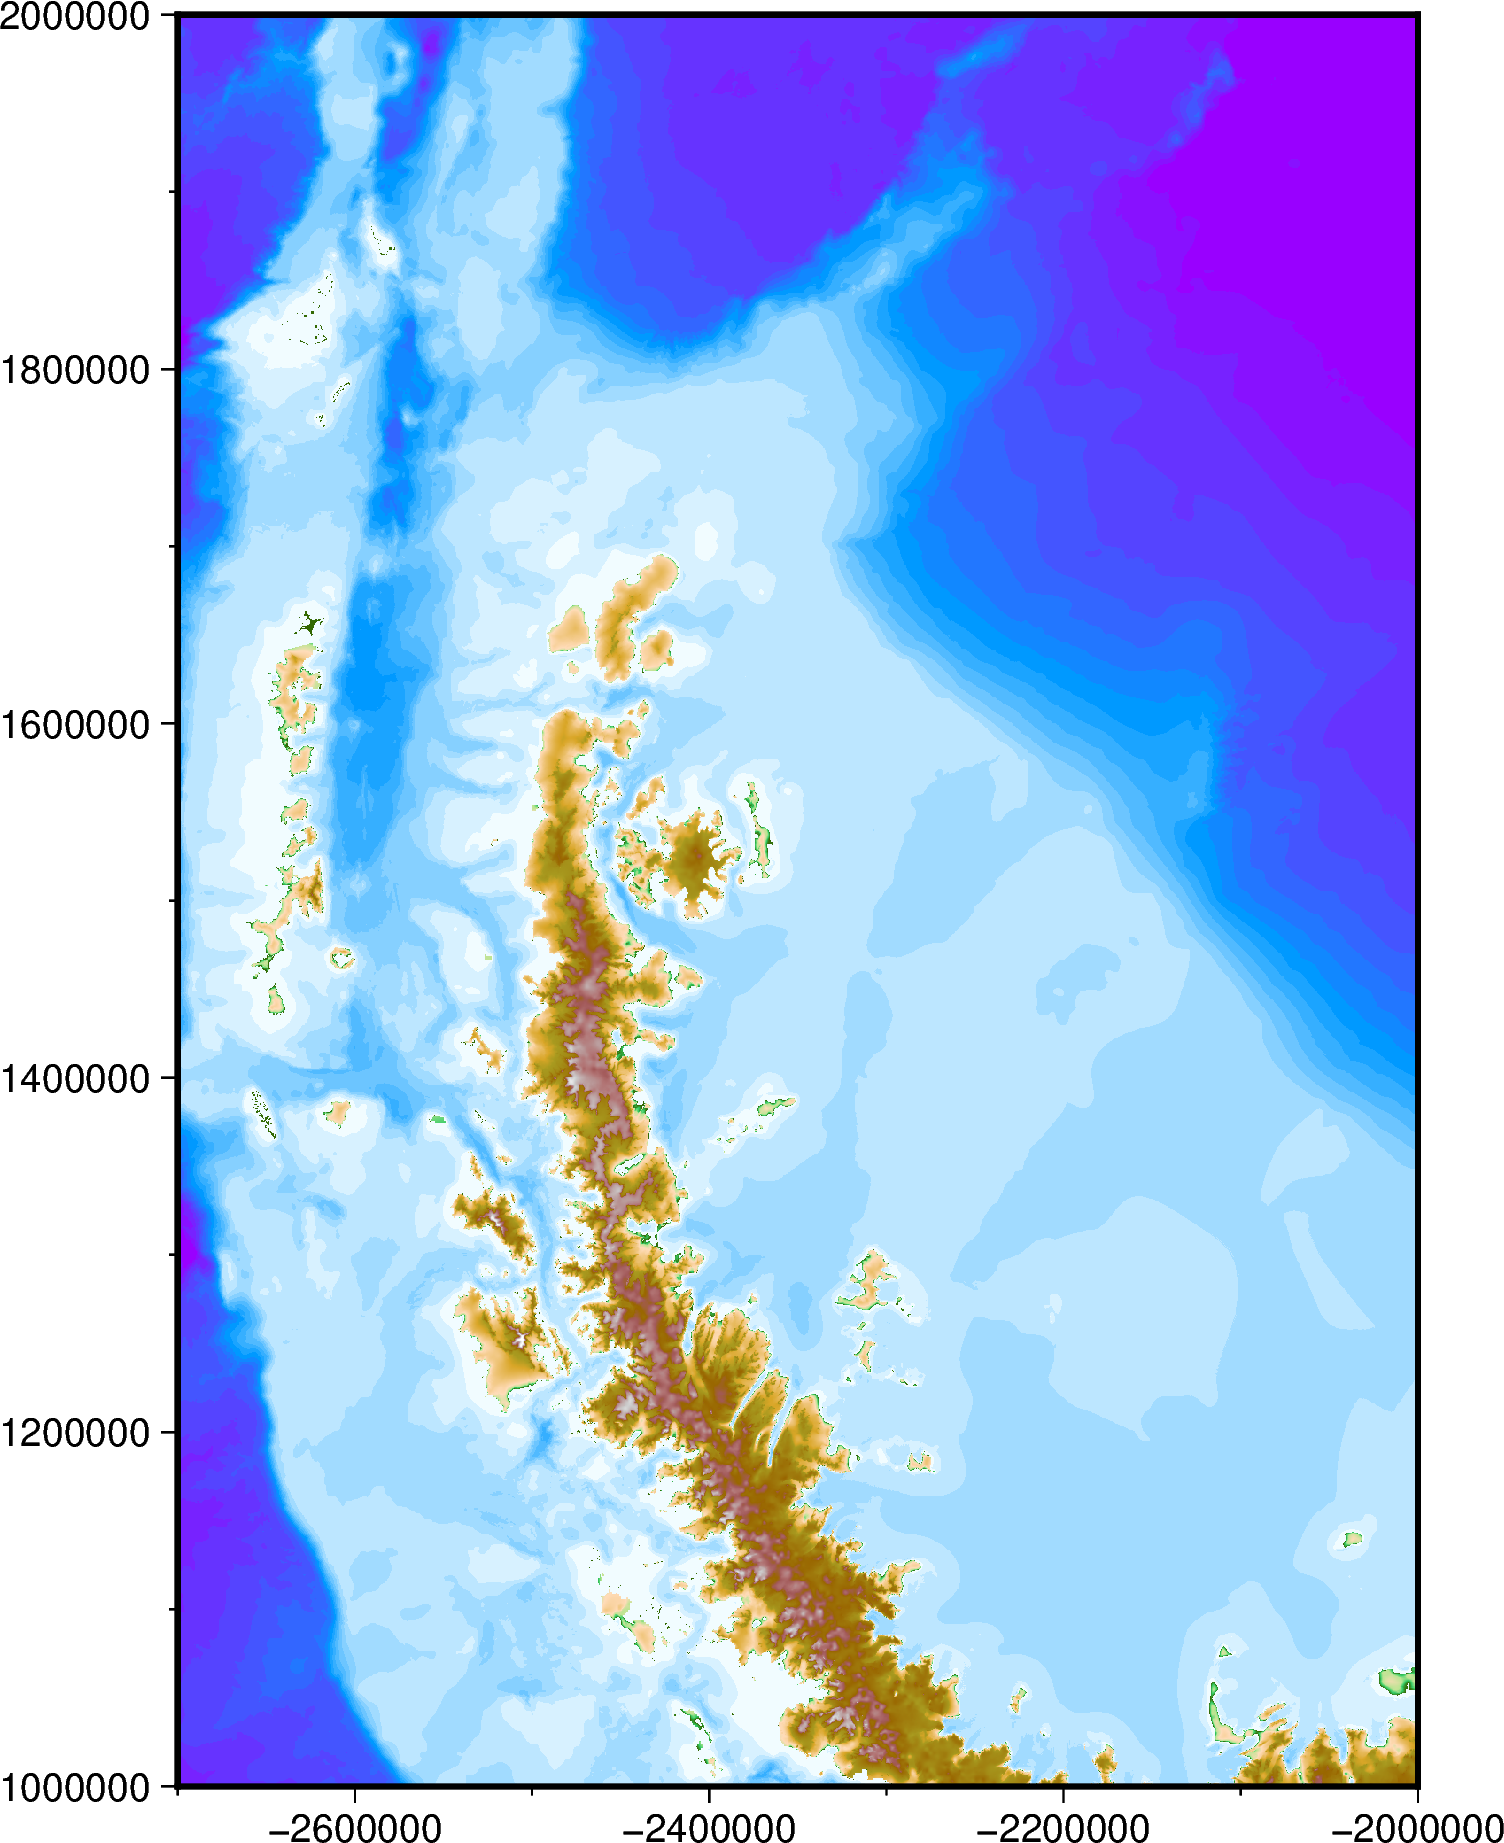

In [12]:
fig = pygmt.Figure()

fig.grdimage(
    grid=bed,
    cmap='globe',
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display the figure
fig.show()

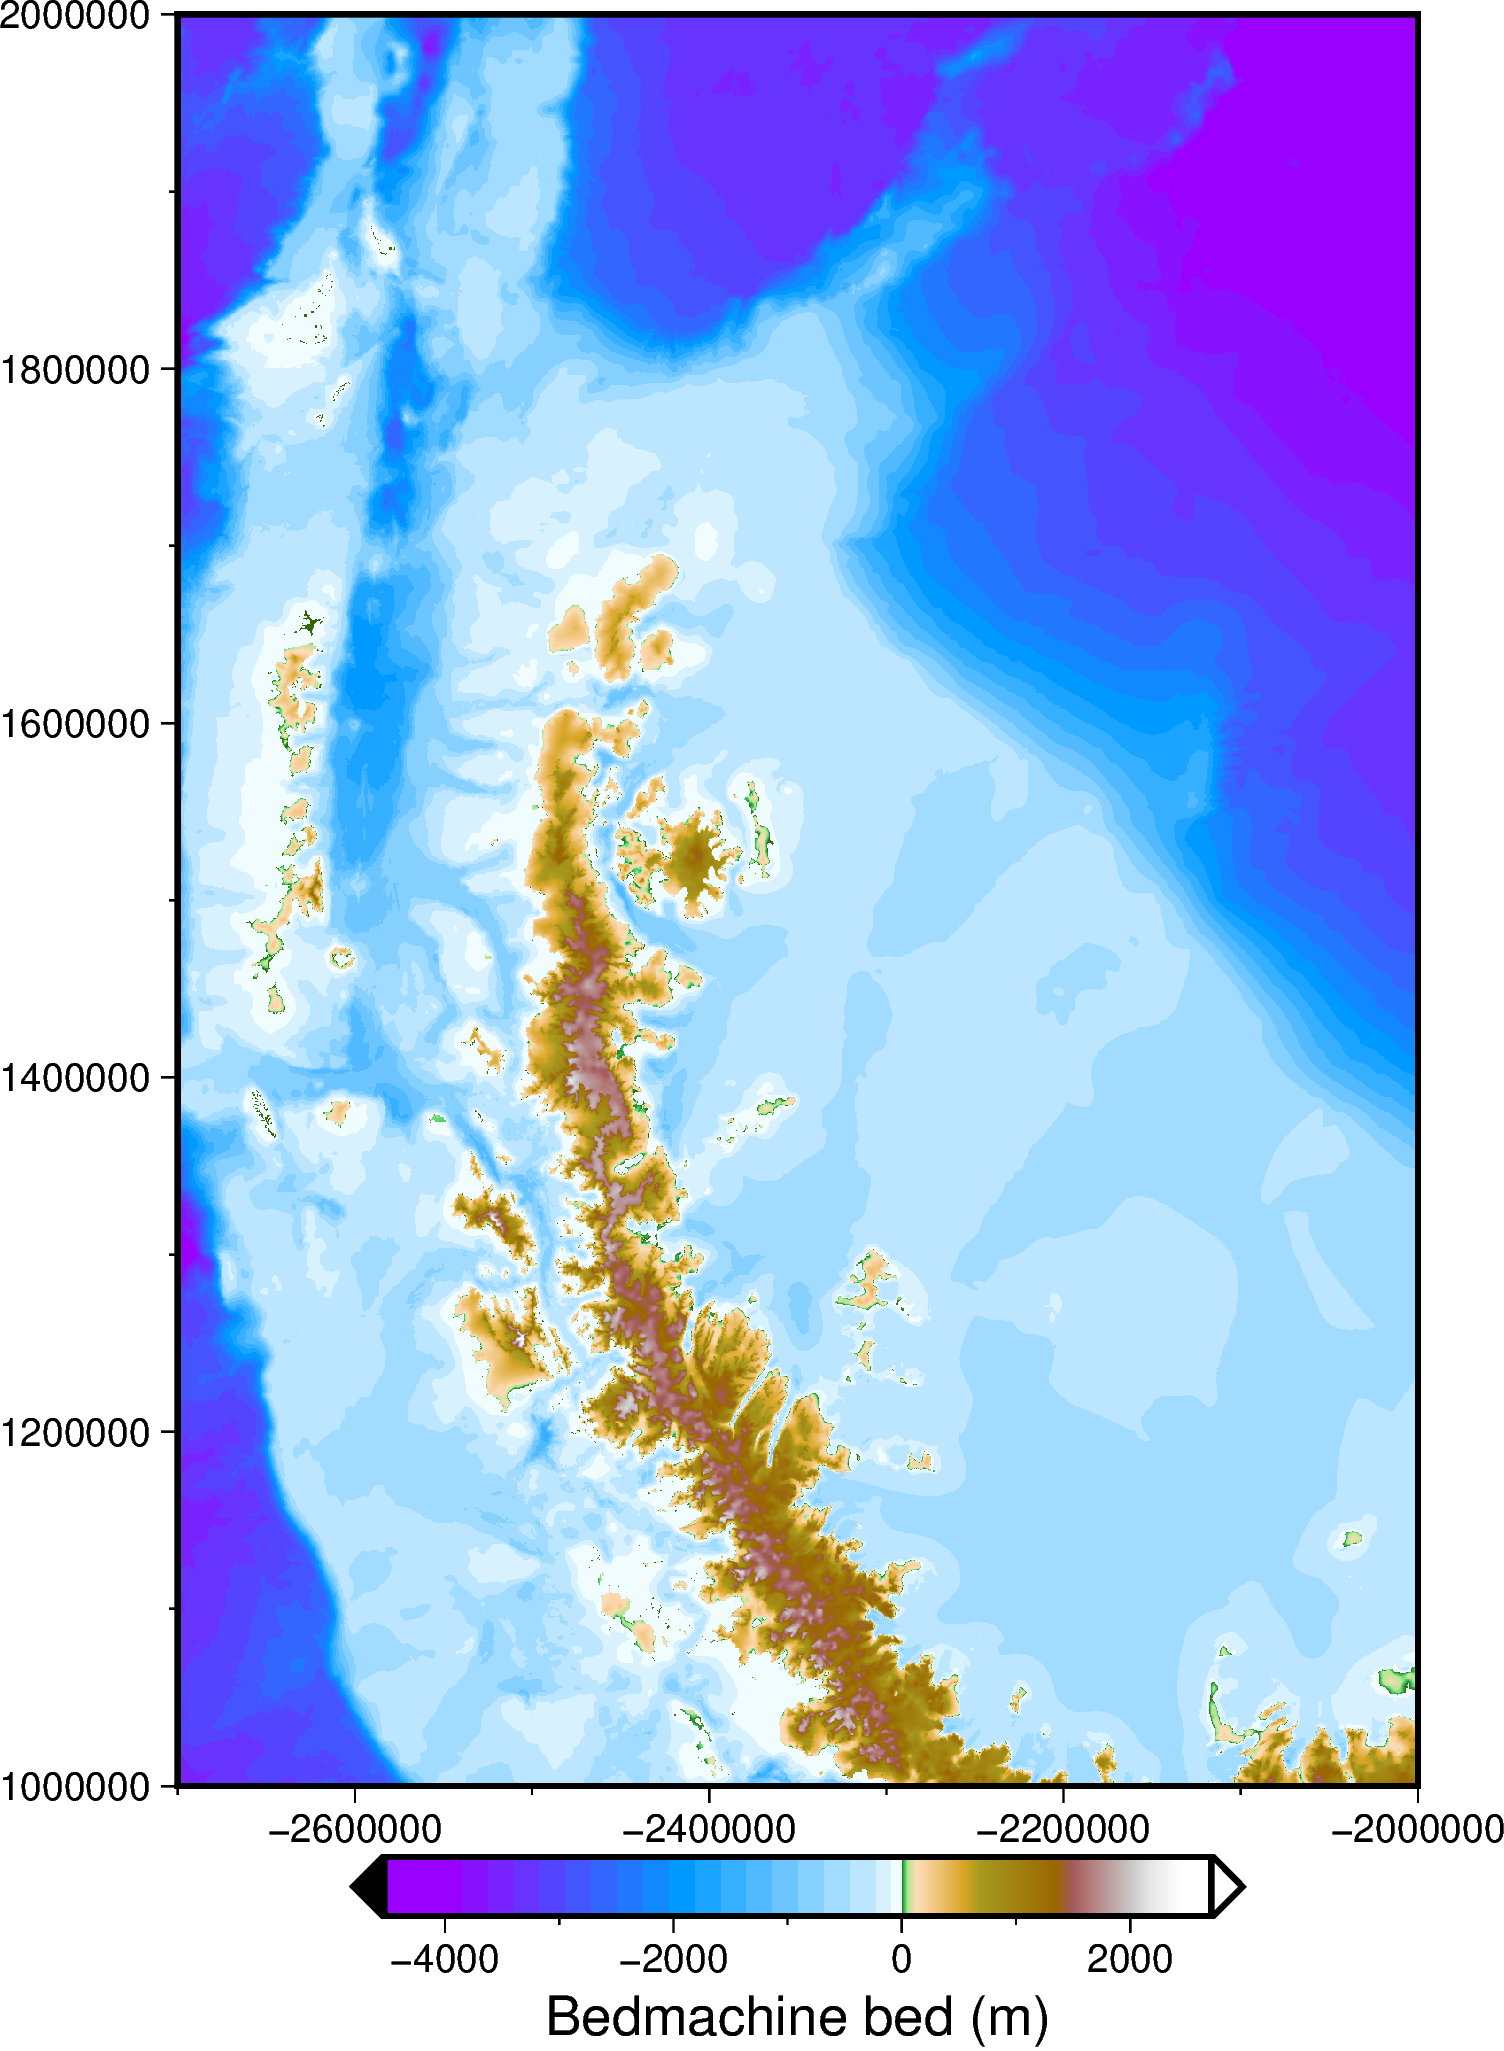

In [13]:
# display colorbar 2/3 as wide as figure

fig.colorbar(
    cmap=True,
    position=f"jBC+w{utils.get_fig_width(fig)*(2/3)}c/.5c+jTC+h+o0c/.6c+e",
    frame="xaf+lBedmachine bed (m)",
)

fig.show()

You can also create the projection by giving a figure width instead of height

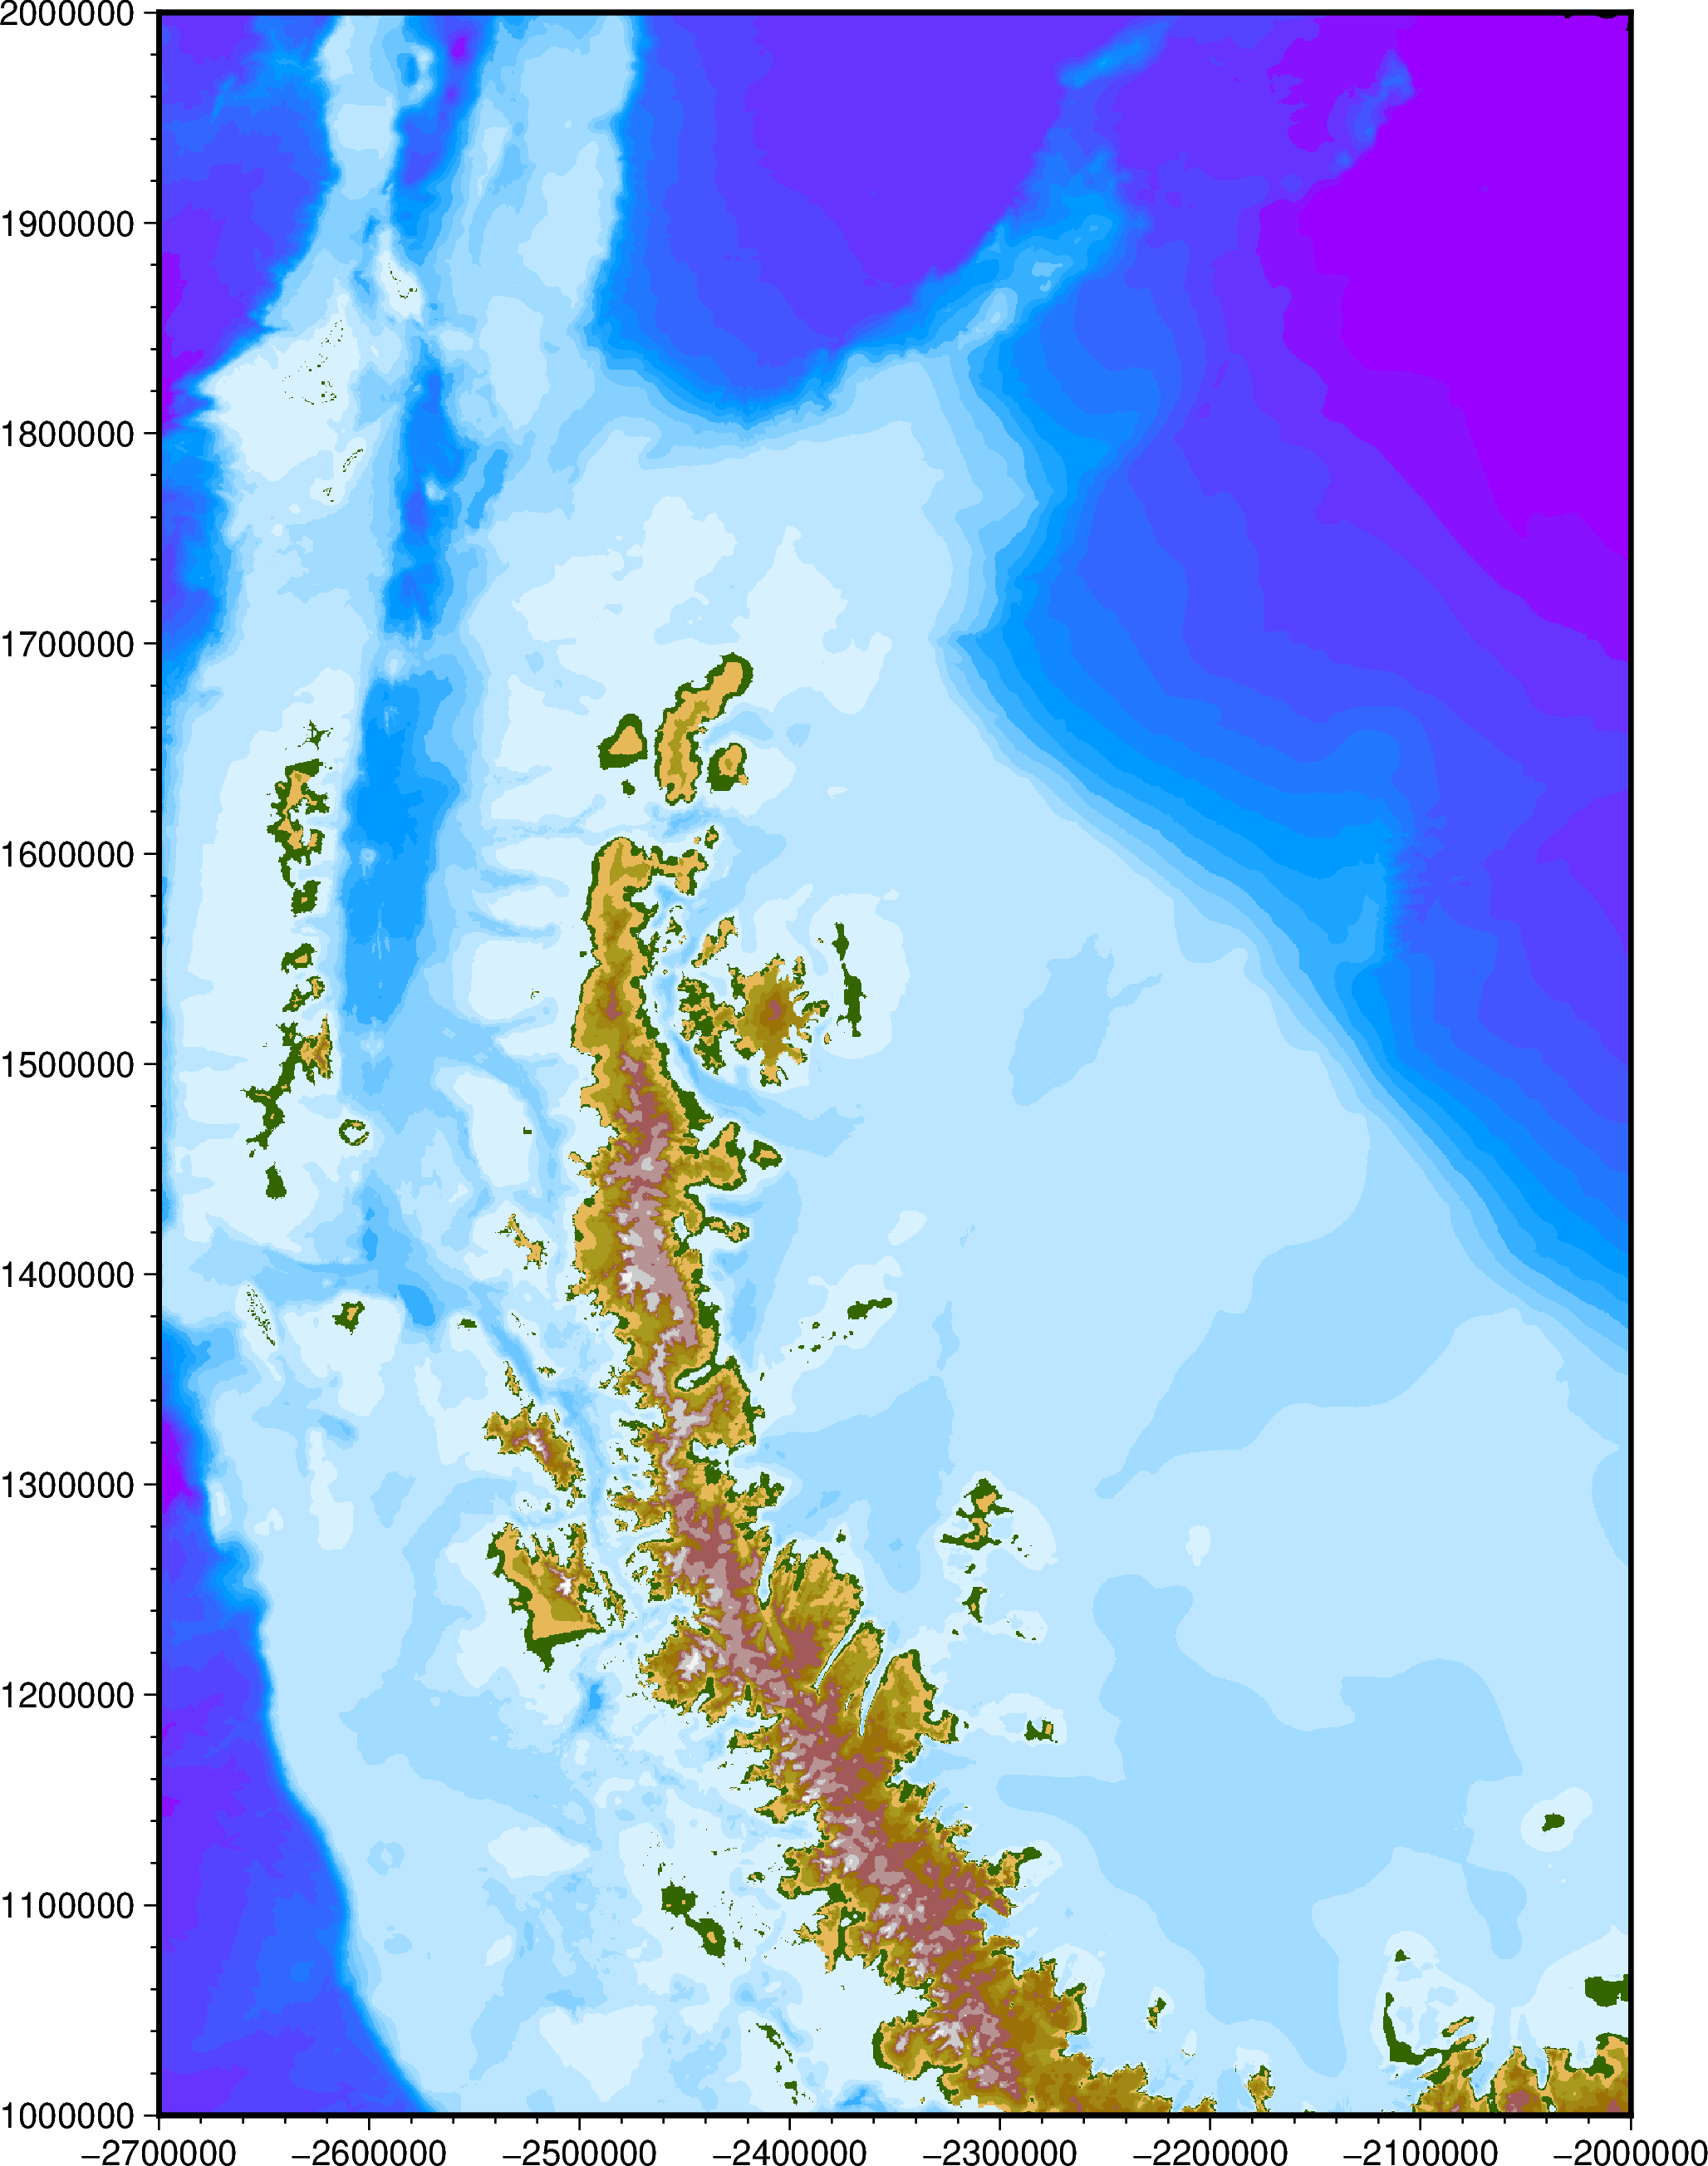

In [55]:
proj_xy = utils.set_proj(region, fig_width=15)[0]

# use standard PyGMT commands to plot figure
fig = pygmt.Figure()

# create a custom colarmap
pygmt.makecpt(
    cmap='globe',
    series="-4500/2500/250", # 250m increments between -4.5 and +2.5 km.
    )

fig.grdimage(
    grid=bed,
    cmap=True,
    projection=proj_xy,
    region=region,
    frame=True,
    nan_transparent=True,
)

# display the figure
fig.show()

You can switch between standard PyGMT commands and Antarctic-Plot commands. 
Here, on the same figure instance, we'll add:
* a colorbar with a histogram
* an inset location map
* the Antarctic coastline and groundingline

returning original grid


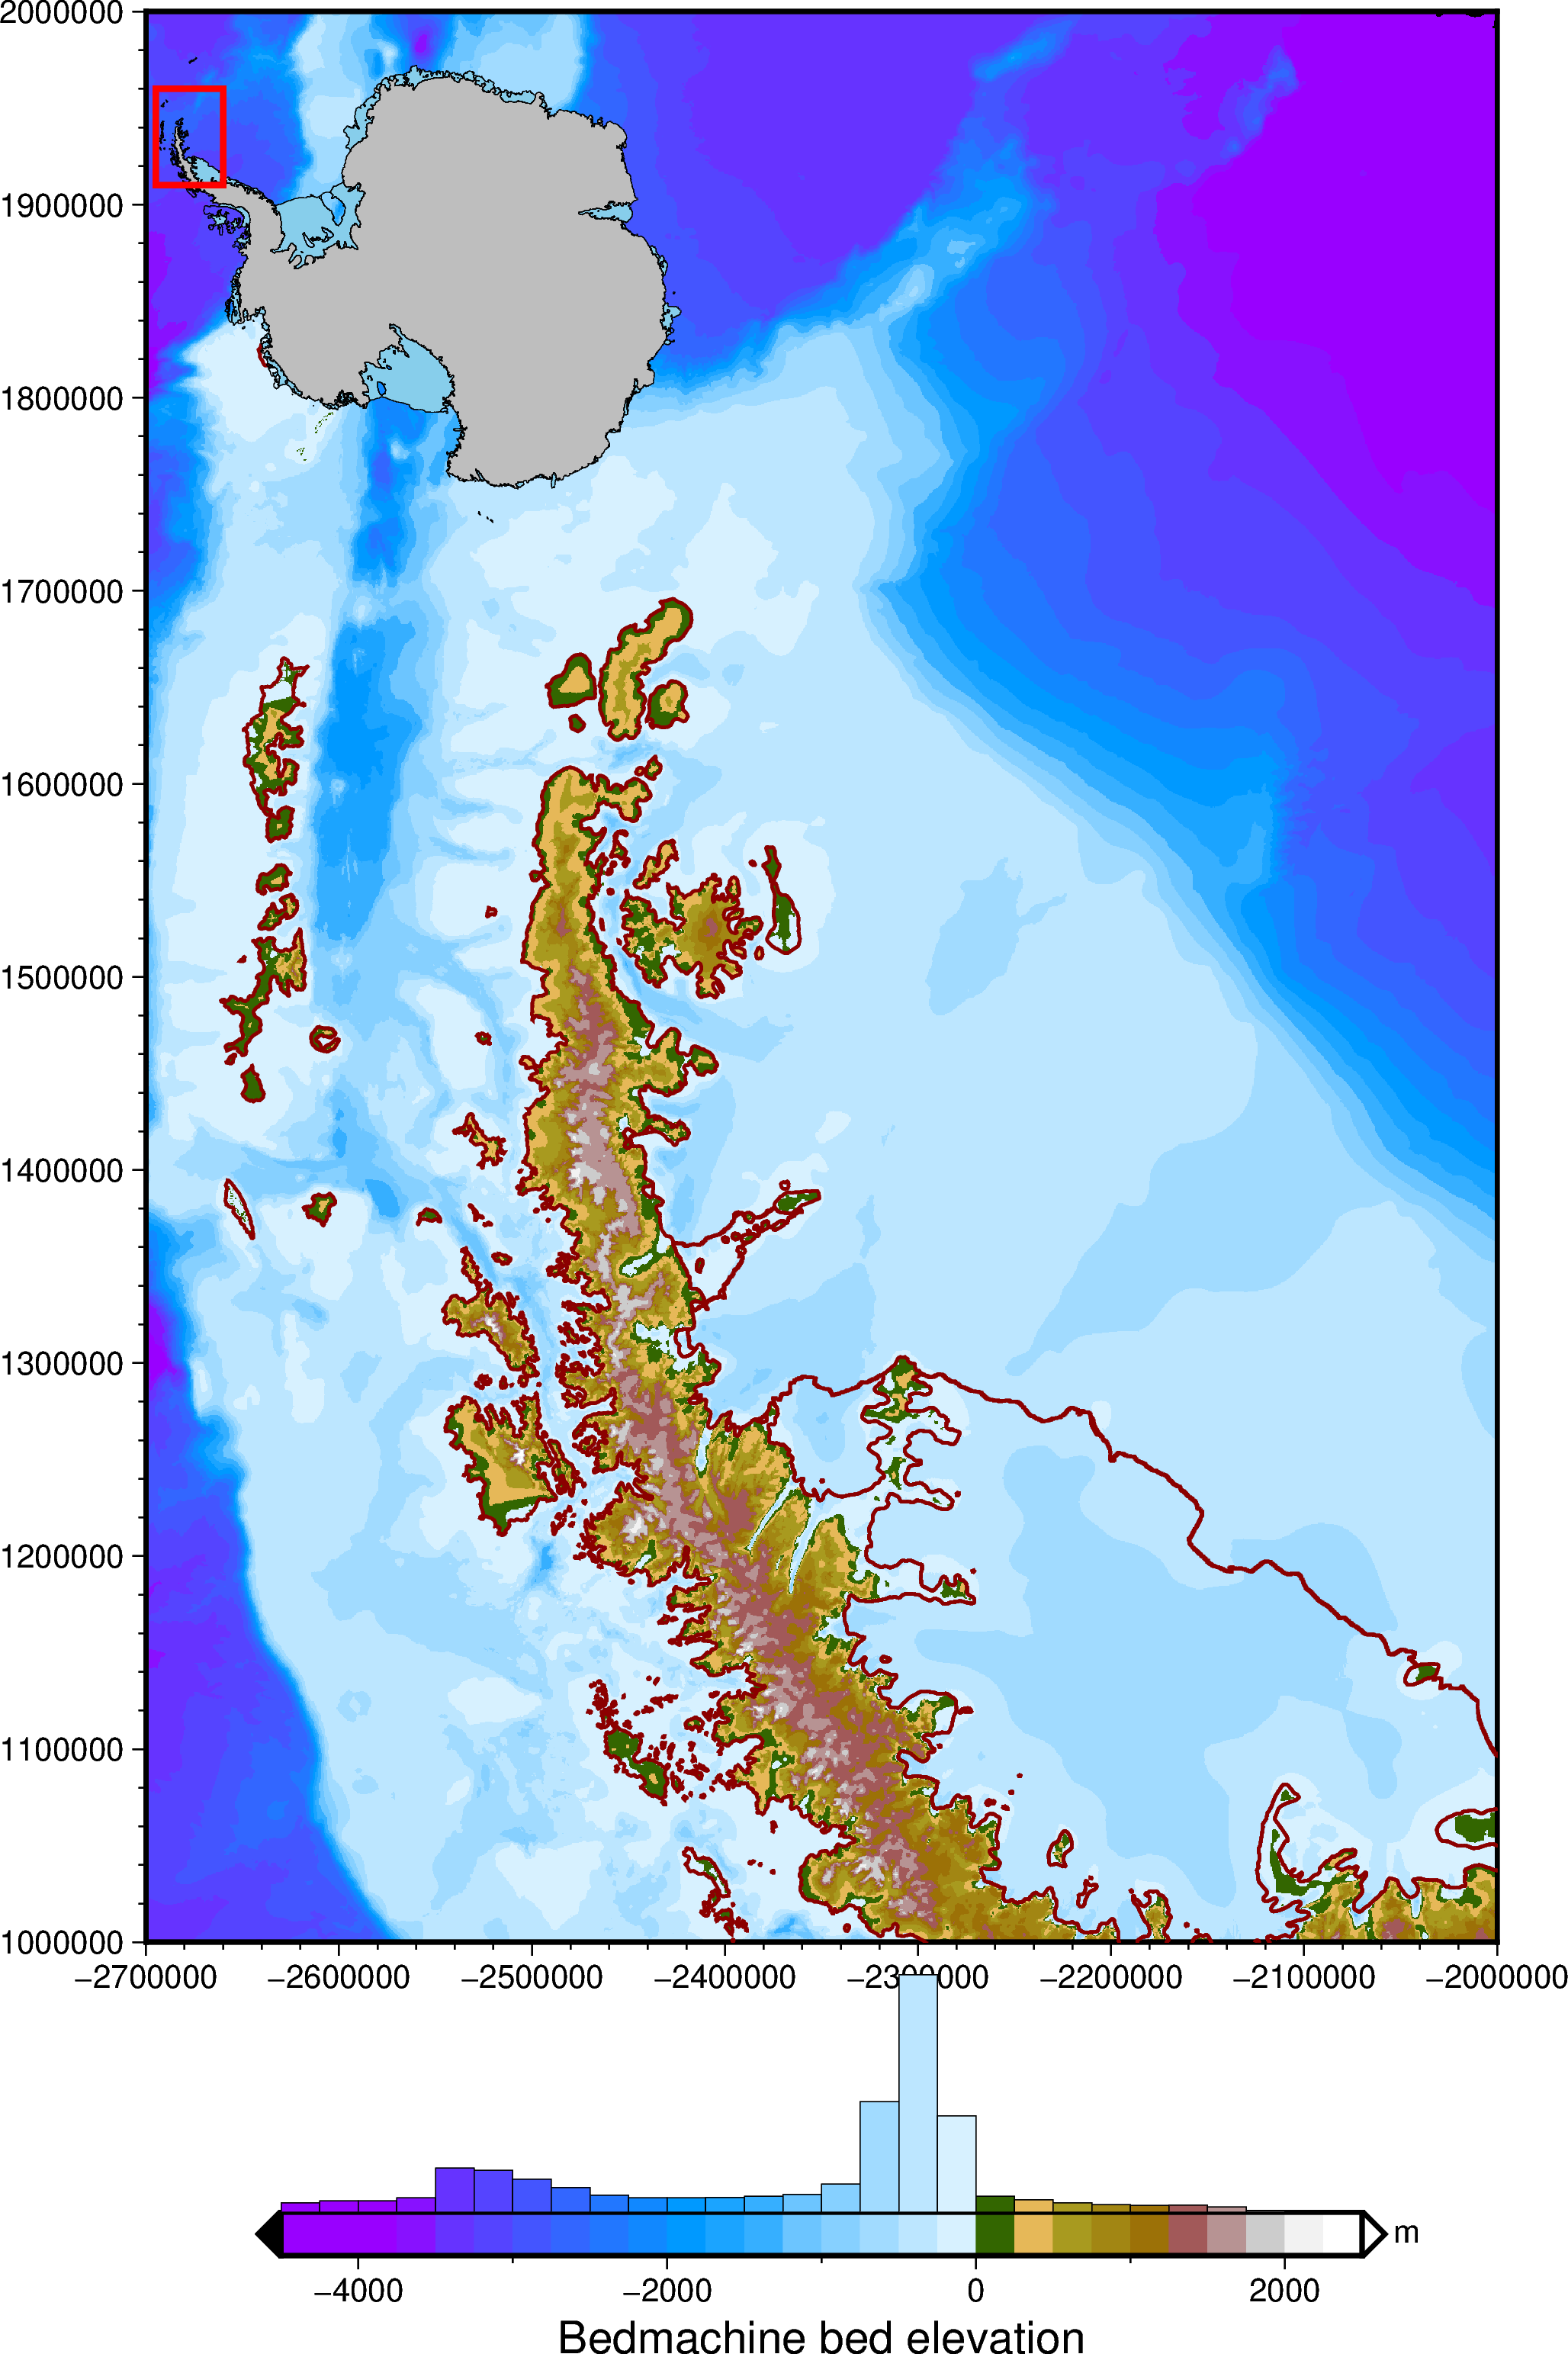

In [56]:
maps.add_coast(fig, pen='1p,darkred')

maps.add_inset(fig, inset_width=.4, inset_box_pen='2p,red')

maps.add_colorbar(
    fig, 
    cbar_label='Bedmachine bed elevation',
    cbar_unit='m',
    hist=True,
    cpt_lims=[-4500, 2500],
    grid=bed,
    hist_bin_width=250, # set this to the cmap interval to match hist bins to cmap bins
    # hist_bin_num=20, # use this instead to set the number of bins
    )

fig.show()

In [57]:
# save the figure to use in the Gallery examples
fig.savefig("outputs/setting_projection.png")